# Comandos para realização do trabalho da matéria de NLP com uso da biblioteca SKlearn e NLTK.

## <font color=red>Observação importante:</font>

<font color=yellow>Trabalho realizado com uso de corpus diferente do Fake.br não será aceito!</font>

## Carregando arquivos `pre-processed.csv`, de imagem e de funções auxiliares para dentro do Google Colab

In [1]:
!wget https://github.com/roneysco/Fake.br-Corpus/archive/refs/heads/master.zip
!unzip master.zip
!rm -f master.zip

!wget https://github.com/Nio00110011/Natural-Language-Processing/archive/refs/heads/main.zip
!unzip main.zip
!mv /content/Natural-Language-Processing-main/mapa_brasil_mask.png /content/mapa_brasil_mask.png
!rm -f main.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: Fake.br-Corpus-master/size_normalized_texts/fake/300.txt  
  inflating: Fake.br-Corpus-master/size_normalized_texts/fake/3000.txt  
  inflating: Fake.br-Corpus-master/size_normalized_texts/fake/3001.txt  
  inflating: Fake.br-Corpus-master/size_normalized_texts/fake/3002.txt  
  inflating: Fake.br-Corpus-master/size_normalized_texts/fake/3003.txt  
  inflating: Fake.br-Corpus-master/size_normalized_texts/fake/3004.txt  
  inflating: Fake.br-Corpus-master/size_normalized_texts/fake/3005.txt  
  inflating: Fake.br-Corpus-master/size_normalized_texts/fake/3006.txt  
  inflating: Fake.br-Corpus-master/size_normalized_texts/fake/3007.txt  
  inflating: Fake.br-Corpus-master/size_normalized_texts/fake/3008.txt  
  inflating: Fake.br-Corpus-master/size_normalized_texts/fake/3009.txt  
  inflating: Fake.br-Corpus-master/size_normalized_texts/fake/301.txt  
  inflating: Fake.br-Corpus-master/size_normalized_texts/fake/3010.

## Instalação manual das dependências para uso do SKlearn e do NLTK no Google Colab

In [2]:
!pip install nltk
!pip install matplotlib

import os, re
import glob
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import LSTM, Bidirectional
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from tqdm import tqdm
import math



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Criar dataframe do CSV utilizando o método read_csv do pandas

In [3]:
#Função de limpeza dos textos
def clean_str(string):
    string = re.sub(r"á", "a", string)
    string = re.sub(r"ã", "a", string)
    string = re.sub(r"â", "a", string)
    string = re.sub(r"é", "e", string)
    string = re.sub(r"ê", "e", string)
    string = re.sub(r"í", "i", string)
    string = re.sub(r"ó", "o", string)
    string = re.sub(r"õ", "o", string)
    string = re.sub(r"ô", "o", string)
    string = re.sub(r"ú", "u", string)
    string = re.sub(r"ç", "c", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"[^a-zA-z0-9\s]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    cleanr = re.compile('<.*?>')
    string = re.sub(r'\d+', '', string)
    string = re.sub(cleanr, '', string)
    string = re.sub("'", '', string)
    string = re.sub(r'\W+', ' ', string)
    string = string.replace('_', '')
    return string.strip().lower()

In [4]:
#Montando dataframe Real
os.chdir("/content/Fake.br-Corpus-master/full_texts/true/")
files = glob.glob("*.txt")
arq_num = int('1')
list_arquivos = []
for file in files:
    arq_num = str(arq_num)
    arquivo = open(file, "r")
    conteudo = arquivo.read()
    list_arquivos.append(conteudo)
    arq_num = int(arq_num)
    arq_num += 1
    arquivo.close()

lista_colunas = ['Id', 'Tag', 'full_text', 'news_text_normalized', 'author', 'link', 'category', 'date_of_publication', 'number_of_tokens', 'number_of_words_without_punctuation', 'number_of_types', 'number_of_links_inside_the_news', 'number_of_words_in_upper_case', 'number_of_verbs', 'number_of_subjuntive_and_imperative_verbs', 'number_of_nouns', 'number_of_adjectives', 'number_of_adverbs', 'number_of_modal_verbs', 'number_of_singular_first_and_second_personal_pronouns', 'number_of_plural_first_personal_pronouns', 'number_of_pronouns', 'pausality', 'number_of_characters', 'average_sentence_length', 'average_word_length', 'percentage_of_news_with_speeling_errors', 'emotiveness', 'diversity']
df_true = pd.DataFrame(data=None,columns=lista_colunas)
df_full_text = pd.DataFrame(list_arquivos)
df_true['full_text'] = df_full_text[0]

df_full_text_norm = pd.DataFrame(list_arquivos)
df_full_text_norm2 = df_full_text_norm[0].apply(lambda x: clean_str(x))
df_true['news_text_normalized'] = df_full_text_norm2[0:]

df_true = df_true.assign(Tag='Real')
id_num = int('1')
list_id = []
for file in files:
    id_num = str(id_num)
    id_num_str = id_num+"-Real"
    list_id.append(file.replace('.txt', '')+"-Real")
    id_num = int(id_num)
    id_num += 1
df_lista_id = pd.DataFrame(list_id)
df_true['Id'] = df_lista_id[0]
#Adicionando metadados ao dataframe Real
os.chdir("/content/Fake.br-Corpus-master/full_texts/true-meta-information/")
lista_colunas = ['author', 'link', 'category', 'date_of_publication', 'number_of_tokens', 'number_of_words_without_punctuation', 'number_of_types', 'number_of_links_inside_the_news', 'number_of_words_in_upper_case', 'number_of_verbs', 'number_of_subjuntive_and_imperative_verbs', 'number_of_nouns', 'number_of_adjectives', 'number_of_adverbs', 'number_of_modal_verbs', 'number_of_singular_first_and_second_personal_pronouns', 'number_of_plural_first_personal_pronouns', 'number_of_pronouns', 'pausality', 'number_of_characters', 'average_sentence_length', 'average_word_length', 'percentage_of_news_with_speeling_errors', 'emotiveness', 'diversity']
cont = 0
for titulo in lista_colunas:
    list_arquivos = []
    arq_num = int('1')
    files = glob.glob("*.txt")
    for file in files:
        arq_num = str(arq_num)
        arquivo = open(file, "r")
        conteudo = arquivo.readlines()
        list_arquivos.append(conteudo[cont])
        arq_num = int(arq_num)
        arq_num += 1
        arquivo.close()
    cont += 1
    df_titulo_coluna = pd.DataFrame(list_arquivos)
    df_true[titulo] = df_titulo_coluna[0]
df_true.head(1)

,Id,Tag,full_text,news_text_normalized,author,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,...,number_of_singular_first_and_second_personal_pronouns,number_of_plural_first_personal_pronouns,number_of_pronouns,pausality,number_of_characters,average_sentence_length,average_word_length,percentage_of_news_with_speeling_errors,emotiveness,diversity
0,2856-Real,Real,"Do que já foi tentado, o que é prioridade para...",do que ja foi tentado o que e prioridade para ...,"Por Renan Ramalho, G1, Brasília \n",https://g1.globo.com/politica/noticia/sete-int...,tv_celebridades\n,25/01/2017 15h36 \n,2620\n,2300\n,...,0\n,3\n,162\n,2.53968\n,12202\n,18.254\n,5.30522\n,0.000869565\n,0.341714\n,0.424348


In [5]:
#Montando dataframe Real
os.chdir("/content/Fake.br-Corpus-master/full_texts/fake/")
files = glob.glob("*.txt")
arq_num = int('1')
list_arquivos = []
for file in files:
    arq_num = str(arq_num)
    arquivo = open(file, "r")
    conteudo = arquivo.read()
    list_arquivos.append(conteudo)
    arq_num = int(arq_num)
    arq_num += 1
    arquivo.close()

lista_colunas = ['Id', 'Tag', 'full_text', 'news_text_normalized', 'author', 'link', 'category', 'date_of_publication', 'number_of_tokens', 'number_of_words_without_punctuation', 'number_of_types', 'number_of_links_inside_the_news', 'number_of_words_in_upper_case', 'number_of_verbs', 'number_of_subjuntive_and_imperative_verbs', 'number_of_nouns', 'number_of_adjectives', 'number_of_adverbs', 'number_of_modal_verbs', 'number_of_singular_first_and_second_personal_pronouns', 'number_of_plural_first_personal_pronouns', 'number_of_pronouns', 'pausality', 'number_of_characters', 'average_sentence_length', 'average_word_length', 'percentage_of_news_with_speeling_errors', 'emotiveness', 'diversity']
df_fake = pd.DataFrame(data=None,columns=lista_colunas)
df_full_text = pd.DataFrame(list_arquivos)
df_fake['full_text'] = df_full_text[0]

df_full_text_norm = pd.DataFrame(list_arquivos)
df_full_text_norm2 = df_full_text_norm[0].apply(lambda x: clean_str(x))
df_fake['news_text_normalized'] = df_full_text_norm2[0:]

df_fake = df_fake.assign(Tag='Fake')
id_num = int('1')
list_id = []
files = glob.glob("*.txt")
for file in files:
    id_num = str(id_num)
    id_num_str = id_num+"-Fake"
    list_id.append(file.replace('.txt', '')+"-Fake")
    id_num = int(id_num)
    id_num += 1
df_lista_id = pd.DataFrame(list_id)
df_fake['Id'] = df_lista_id[0]
#Adicionando metadados ao dataframe Fake
os.chdir("/content/Fake.br-Corpus-master/full_texts/fake-meta-information/")
lista_colunas = ['author', 'link', 'category', 'date_of_publication', 'number_of_tokens', 'number_of_words_without_punctuation', 'number_of_types', 'number_of_links_inside_the_news', 'number_of_words_in_upper_case', 'number_of_verbs', 'number_of_subjuntive_and_imperative_verbs', 'number_of_nouns', 'number_of_adjectives', 'number_of_adverbs', 'number_of_modal_verbs', 'number_of_singular_first_and_second_personal_pronouns', 'number_of_plural_first_personal_pronouns', 'number_of_pronouns', 'pausality', 'number_of_characters', 'average_sentence_length', 'average_word_length', 'percentage_of_news_with_speeling_errors', 'emotiveness', 'diversity']
cont = 0
for titulo in lista_colunas:
    list_arquivos = []
    arq_num = int('1')
    files = glob.glob("*.txt")
    for file in files:
        arq_num = str(arq_num)
        arquivo = open(file, "r")
        conteudo = arquivo.readlines()
        list_arquivos.append(conteudo[cont])
        arq_num = int(arq_num)
        arq_num += 1
        arquivo.close()
    cont += 1
    df_titulo_coluna = pd.DataFrame(list_arquivos)
    df_fake[titulo] = df_titulo_coluna[0]
df_fake.head(1)

,Id,Tag,full_text,news_text_normalized,author,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,...,number_of_singular_first_and_second_personal_pronouns,number_of_plural_first_personal_pronouns,number_of_pronouns,pausality,number_of_characters,average_sentence_length,average_word_length,percentage_of_news_with_speeling_errors,emotiveness,diversity
0,2856-Fake,Fake,Assassina que matou a própria mãe recebe indul...,assassina que matou a propria mae recebe indul...,None\n,https://www.diariodobrasil.org/pt-e-foro-de-sp...,tv_celebridades\n,03/05/2016\n,112\n,103\n,...,0\n,0\n,4\n,1.5\n,483\n,17.1667\n,4.68932\n,0.0194175\n,0.217391\n,0.708738


In [6]:
#unindo os dataframes Real e Fake
df_full = pd.concat([df_true, df_fake])
df_full_pre_proc = df_full.rename(columns={'Tag': 'sentiment', 'news_text_normalized': 'text'})
df_clone=df_full_pre_proc[:]
pre_processado=df_clone[['sentiment','text']]
os.chdir("/content")
#Salvando e lendo arquivos .csv
df_full.to_csv('df_full.csv', index=False, encoding='utf-8')
os.chdir("/content")
pre_processado.to_csv('pre_processado.csv', index=False, encoding='utf-8')
pre_processado_csv = pd.read_csv('pre_processado.csv', encoding='utf-8')
pre_processado_csv

,sentiment,text
0,Real,do que ja foi tentado o que e prioridade para ...
1,Real,apos decisao do stf goleiro bruno se apresenta...
2,Real,kadafi abasteceu campanha de lula com us milha...
3,Real,karl jaspers analisa responsabilidade do povo ...
4,Real,stj nega habeas corpus preventivo por unanimid...
...,...,...
7195,Fake,voto de numero que dara um sim definitivo pode...
7196,Fake,russia acusa eua de plantar ataque quimico na ...
7197,Fake,general que criticou liberacao de vistos duran...
7198,Fake,a fadinha do dente visitou o senado parlamenta...


In [7]:
for col in df_full.filter(like='full_text').columns:
    corpus = df_full.filter(like='full_text')[col].tolist()
vectorizer = TfidfVectorizer(sublinear_tf=True, smooth_idf=True, use_idf=True)
X = vectorizer.fit_transform(corpus)
names = vectorizer.get_feature_names_out()
print(X.shape)
print(X)

(7200, 85756)
  (0, 18879)	0.018256775068360653
  (0, 81864)	0.035963463186939756
  (0, 54857)	0.016436397534031606
  (0, 85702)	0.01979179926425038
  (0, 71324)	0.02256010934117977
  (0, 63596)	0.026276559713412986
  (0, 47165)	0.021888442641179364
  (0, 65692)	0.025326106161269887
  (0, 63481)	0.017357985491160185
  (0, 28843)	0.03399215125152867
  (0, 23426)	0.04270342321166205
  (0, 85294)	0.04130475513471198
  (0, 68963)	0.027185130115986476
  (0, 24685)	0.0528174132306386
  (0, 66427)	0.023279648163399932
  (0, 63998)	0.03988341902342062
  (0, 57218)	0.01316598113996938
  (0, 54861)	0.011562141123876124
  (0, 25141)	0.019634258565162422
  (0, 50708)	0.02551134203018457
  (0, 59756)	0.03684988387716293
  (0, 28587)	0.035963463186939756
  (0, 59757)	0.07564090185652918
  (0, 80841)	0.012332627755849444
  (0, 64868)	0.013123149043002684
  :	:
  (7199, 29246)	0.07814096056511714
  (7199, 57773)	0.10704875805263436
  (7199, 82330)	0.03189432456557666
  (7199, 56283)	0.0391819528894830

In [8]:
#Imprime a matriz termo-documento
# Imprime linha com indice dos documentos
#print('{:>12}'.format(' '), end='\t')
#for i in range(X.shape[0]):
#    print('{:<5d}'.format(i), end=' ')
#print()
# Imprime matriz termo-documento
#for j in range(X.shape[1]):
#    print('{:>12}'.format(names[j]), end='\t')
#    for i in range(X.shape[0]):
#        print('{:.3f}'.format(X[i,j]), end=' ')
#    print()
#print()
# Calcula e imprime a norma
#print('{:>12}'.format('Norma:'), end='\t')
#for i in range(X.shape[0]):
#    norma = 0
#    for j in range(X.shape[1]):
#        norma += X[i,j] * X[i,j]
#    print('{:.3f}'.format(math.sqrt(norma)), end=' ')


In [9]:
#rank dos documentos
# Imprime linha com indice dos documentos
#print('{:>12}'.format(' '), end='\t')
#for i in range(X.shape[0]):
#    print('{:<5d}'.format(i), end=' ')
#print()
# Imprime consulta
#for j in range(X.shape[1]):
#    if j == 3 or j == 7:
#        print('{:>12}'.format(names[j]), end='\t')
#        for i in range(X.shape[0]):
#            print('{:.3f}'.format(X[i,j]), end=' ')
#        print()
#print()
# Para obter o rank, calcula a norma apenas para os termos considerados
#print('{:>12}'.format('Rank:'), end='\t')
#for i in range(X.shape[0]):
#    norma = 0
#    for j in range(X.shape[1]):
#        if j == 3 or j == 7:
#            norma += X[i,j] * X[i,j]
#    print('{:.3f}'.format(math.sqrt(norma)), end=' ')

# PRÁTICA 1 - CRIAÇÃO DE MODELO DE CLASSIFICAÇÃO SUPERVISIONADO PARA ANÁLISE DE FAKE NEWS.

1. Realize os seguintes procedimentos de limpeza dos textos do dataframe criado:

  1.1. Tokenizar

  1.2. Retirar os acentos e números

  1.3. Deixar tudo em minúsculas

  1.4. Retirar as stopwords e pontuações

  1.5. Deixar palavras apenas com radical (STEM)

  1.6. Realizar truncamento dos pares de notícias verdadeiras com falsas para normalizar quantidade de palavras

  1.7. Remontar as notícias em string e criar coluna no dataframe para o resultado deste pré-processamento.

2. Criar matriz de frequências TF-IDF com ngramas de 1 a 3 palavras.

3. Usar a função train_test_split do Scikit Learn para dividir o corpus pré-tratado em 75% dos textos para treinamento e 25% para testes de precisão (usar random_state = 42 ou outro número de sua escolha).

4. Fazer regressão logística com solver = 'lbfgs'.

5. Realizar predição dos textos de teste com o método predict_proba, que retornará a porcentagem predita para fake e para real em um array.

6. Por fim, com as porcentagens calculadas para cada texto de teste, usar a função accuracy_score da biblioteca Scikit Learn para calcular a acurácia geral do algoritmo.

In [10]:
#Variáveis para atribuição de valores
seed = 7
np.random.seed(seed)

# O model será exportado para este arquivo
filename='model_saved.h5'

epochs = 8

# Dimensionalidade do word embedding pré-treinado
word_embedding_dim = 50

# Número de amostras a serem utilizadas em cada atualização do gradiente
batch_size = 32

# Quantidade máxima de palavras que iremos manter no vocabulário
max_fatures = 5000

# Dimensão de saída da camada Embedding
embed_dim = 128

# Limitação do tamanho máximo de todas as sentenças
max_sequence_length = 300

In [11]:
#Preparando o conjunto de treinamento e de teste.
def prepare_data(data):

    data = data[['text','sentiment']]

    #data['text'] = data['text'].apply(lambda x: x.lower())
    #data['text'] = data['text'].apply(lambda x: clean_str(x))
    #data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

    stop_words = set(stopwords.words('portuguese'))
    text = []
    for row in data['text'].values:
        word_list = text_to_word_sequence(row)
        no_stop_words = [w for w in word_list if not w in stop_words]
        no_stop_words = " ".join(no_stop_words)
        text.append(no_stop_words)


    tokenizer = Tokenizer(num_words=max_fatures, split=' ')

    tokenizer.fit_on_texts(text)
    X = tokenizer.texts_to_sequences(text)

    X = pad_sequences(X, maxlen=max_sequence_length)
    #X = pad_sequences(X)

    word_index = tokenizer.word_index
    Y = pd.get_dummies(data['sentiment']).values
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 63)

    return X_train, X_test, Y_train, Y_test, word_index, tokenizer

In [12]:
#Leitura dos dados do arquivo .csv e chamando a função prepare_data(data)
data = pd.read_csv('pre_processado.csv')

X_train, X_test, Y_train, Y_test, word_index, tokenizer = prepare_data(data)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(5400, 300) (5400, 2)
(1800, 300) (1800, 2)


In [13]:
#Criando a função modelo com a rede LSTM
def model():
    input_shape = (max_sequence_length,)
    model_input = Input(shape=input_shape, name="input", dtype='int32')
    embedding = Embedding(max_fatures, embed_dim, input_length=max_sequence_length, name="embedding")(model_input)
    lstm = LSTM(embed_dim, dropout=0.2, recurrent_dropout=0.2, name="lstm")(embedding)
    model_output = Dense(2, activation='softmax', name="softmax")(lstm)
    model = Model(inputs=model_input, outputs=model_output)
    return model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 softmax (Dense)             (None, 2)                 258       
                                                                 
Total params: 771842 (2.94 MB)
Trainable params: 771842 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/8
169/169 [==============================] - 157s 889ms/step - loss: 0.5927 - accuracy: 0.6304 - val_loss: 0.4391 - val_accuracy: 0.8678
Epoch 2

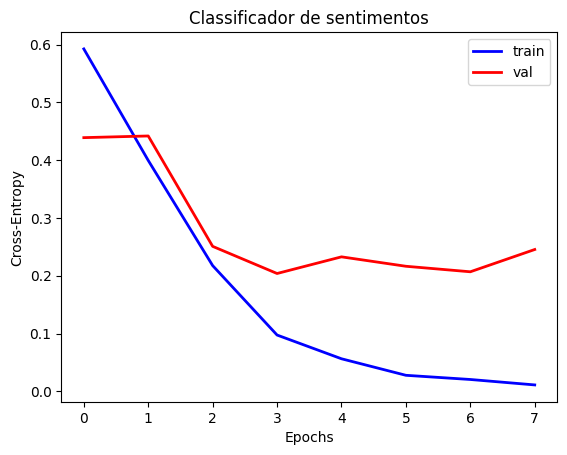

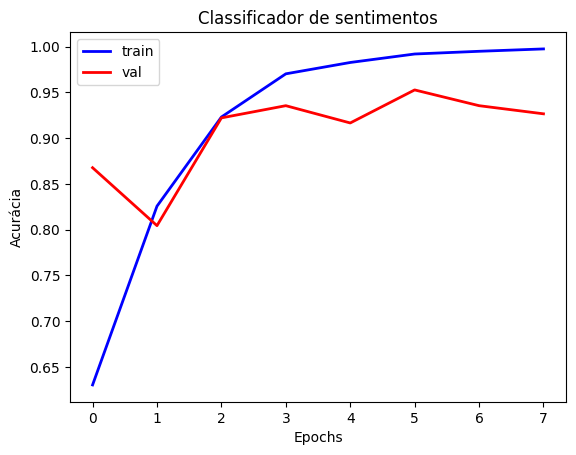

In [14]:
#Criação e execução do modelo
model = model()

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

print(model.summary())

if not os.path.exists('./{}'.format(filename) ):

    hist = model.fit(
        X_train,
        Y_train,
        validation_data=(X_test, Y_test),
        epochs=epochs,
        batch_size=batch_size,
        shuffle=True,
        verbose=1)

    model.save_weights(filename)


    # Plot
    plt.figure()
    plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
    plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
    plt.title('Classificador de sentimentos')
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(loc='upper right')
    plt.show()

    plt.figure()
    plt.plot(hist.history['accuracy'], lw=2.0, color='b', label='train')
    plt.plot(hist.history['val_accuracy'], lw=2.0, color='r', label='val')
    plt.title('Classificador de sentimentos')
    plt.xlabel('Epochs')
    plt.ylabel('Acurácia')
    plt.legend(loc='upper left')
    plt.show()

else:
    model.load_weights('./{}'.format(filename) )

In [15]:
#Calcular a acurácia da rede
scores = model.evaluate(X_test, Y_test, verbose = 0, batch_size = batch_size)
print("Acc: %.2f%%" % (scores[1]*100))

while True:
    sentence = input("input> ")

    if sentence == "exit":
        break

    new_text = [sentence]
    new_text = tokenizer.texts_to_sequences(new_text)

    new_text = pad_sequences(new_text, maxlen=max_sequence_length, dtype='int32', value=0)

    sentiment = model.predict(new_text,batch_size=1,verbose = 2)[0]

    if(np.argmax(sentiment) == 0):
        pred_proba = "%.2f%%" % (sentiment[0]*100)
        print("Fake => ", pred_proba)
    elif (np.argmax(sentiment) == 1):
        pred_proba = "%.2f%%" % (sentiment[1]*100)
        print("Real => ", pred_proba)

Acc: 92.67%
input> Lula é ladrão
1/1 - 0s - 484ms/epoch - 484ms/step
Fake =>  100.00%
input> exit


## QUESTÃO 01: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos VERDADEIROS.

1. Formate seus dados usados para o treinamento do seu modelo em um dicionário de tokens e suas frequências.
2. Separe os dados em um grupo com textos marcados como verdadeiros e outro com os falsos.
3. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras


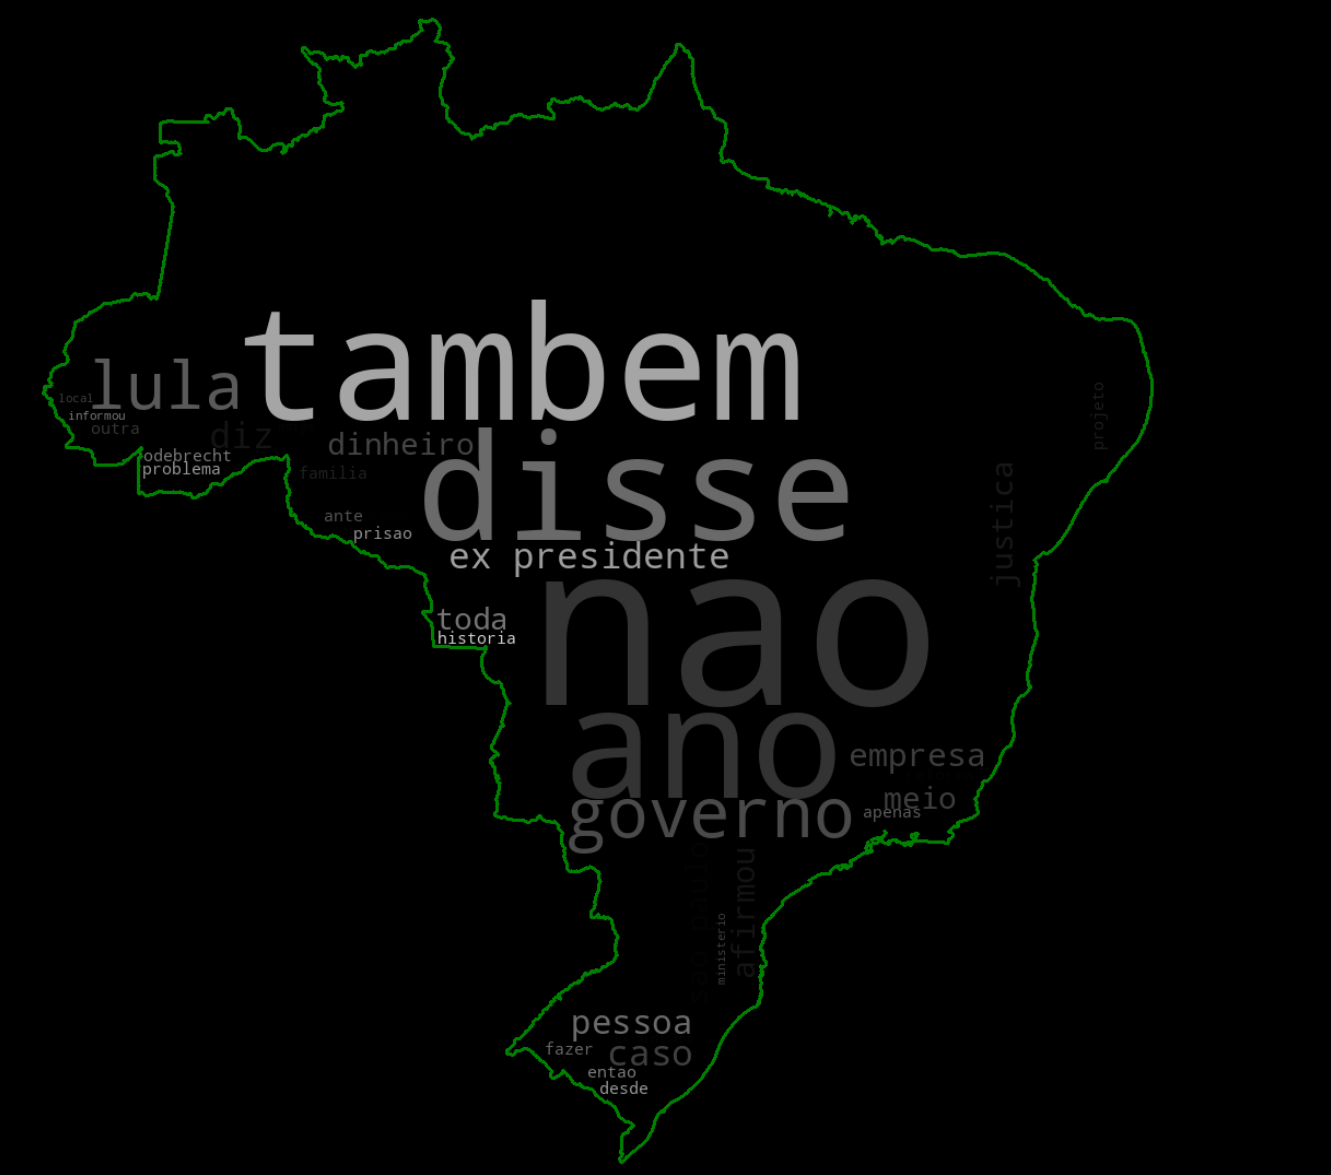

In [16]:
#Gerar nuvens de palavras Real
os.chdir("/content/")
df_true['news_text_normalized'].to_csv(r'df_true_news_text_normalized.txt', header=None, index=None, sep=' ')

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

RU: 3928794

# importa o texto
texto = open('df_true_news_text_normalized.txt').read()

# importa as stopwords em português
stopwords = set(stopwords.words('portuguese'))

# transforma as stopwords em um lista
lista_stopwords = stopwords

# abre uma imagem e a transforma em um array do numpy
mask_frasco = np.array(Image.open('mapa_brasil_mask.png'))

# pega as cores da imagem acima
mask_cores = ImageColorGenerator(mask_frasco)

# inicializa uma word cloud
wordcloud = WordCloud(stopwords = lista_stopwords,
                      mask = mask_frasco, # imagem utilizada
                      background_color = 'black', # cor de fundo
                      width = 1000, # largura
                      height = 500, # altura
                      contour_width = 2, # espessura do contorno
                      contour_color = 'green', # cor do contorno
                      color_func = mask_cores) # cores das palavras

# gera uma wordcloud através do texto
wordcloud.generate(texto)

plt.figure(figsize = (20, 15), facecolor = 'k') # tamanho do gráfico
plt.imshow(wordcloud, interpolation = 'bilinear') # plotagem da nuvem de palavras
plt.axis('off') # remove as bordas
plt.show() # mostra a word cloud



## QUESTÃO 02: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos FALSOS.

1. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras

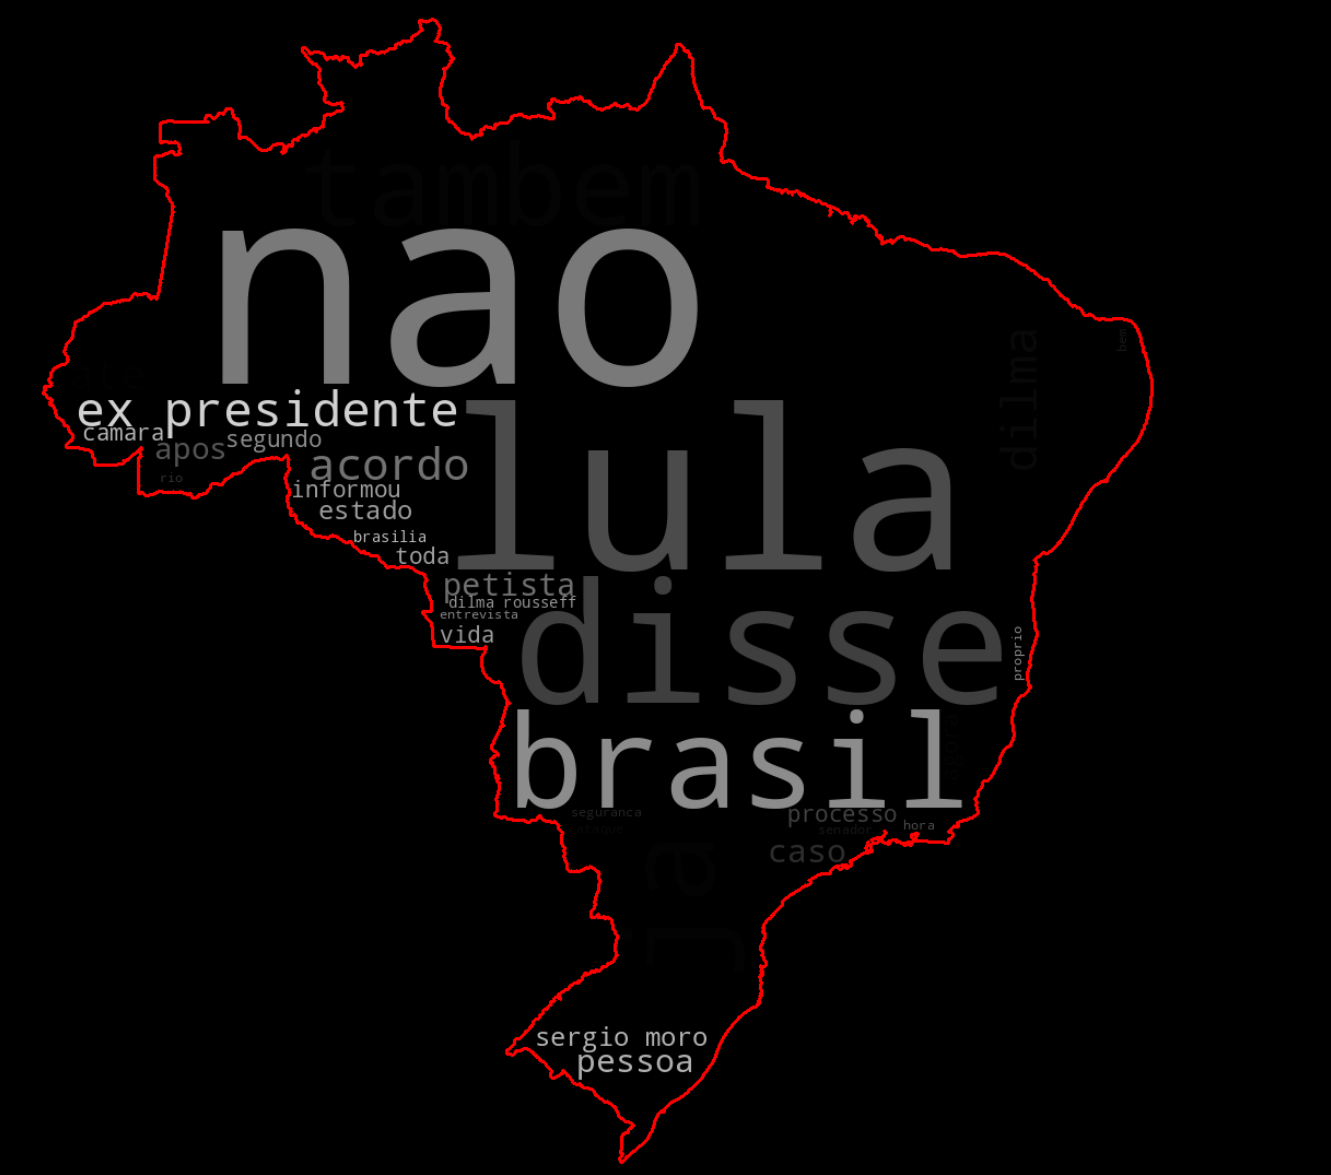

In [17]:
#Gerar nuvens de palavras Fake
df_fake['news_text_normalized'].to_csv(r'df_fake_news_text_normalized.txt', header=None, index=None, sep=' ')

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

RU: 3928794

# importa o texto
texto = open('df_fake_news_text_normalized.txt').read()

# importa as stopwords em português
stopwords = set(stopwords.words('portuguese'))

# transforma as stopwords em um lista
lista_stopwords = stopwords

# abre uma imagem e a transforma em um array do numpy
mask_frasco = np.array(Image.open('mapa_brasil_mask.png'))

# pega as cores da imagem acima
mask_cores = ImageColorGenerator(mask_frasco)

# inicializa uma word cloud
wordcloud = WordCloud(stopwords = lista_stopwords,
                      mask = mask_frasco, # imagem utilizada
                      background_color = 'black', # cor de fundo
                      width = 1000, # largura
                      height = 500, # altura
                      contour_width = 2, # espessura do contorno
                      contour_color = 'red', # cor do contorno
                      color_func = mask_cores) # cores das palavras

# gera uma wordcloud através do texto
wordcloud.generate(texto)

plt.figure(figsize = (20, 15), facecolor = 'k') # tamanho do gráfico
plt.imshow(wordcloud, interpolation = 'bilinear') # plotagem da nuvem de palavras
plt.axis('off') # remove as bordas
plt.show() # mostra a word cloud



---